# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/matrix_multiplication.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# Matrix Multiplication: Building Intuition

This example demonstrates matrix multiplication with PyTorch and 
builds intuition for how dimensions work when multiplying matrices.


## Setup and Imports
First, we'll import the necessary libraries and set up our visualization tools.


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from typing import Tuple, List

# Create a nicer colormap for visualizing matrices
colors = [(0.8, 0.8, 1), (0.1, 0.3, 0.8)]  # Light blue to darker blue
cmap = LinearSegmentedColormap.from_list("custom_blue", colors, N=100)


## Matrix Visualization Function
We'll create a function to visualize matrices as heatmaps with annotations.


In [2]:
def visualize_matrix(matrix: torch.Tensor, title: str = "") -> None:
    """
    Visualize a matrix as a heatmap.
    
    Args:
        matrix: PyTorch tensor to visualize
        title: Optional title for the plot
    """
    # Convert to numpy for matplotlib
    matrix_np = matrix.detach().cpu().numpy()
    
    plt.figure(figsize=(7, 7))
    plt.imshow(matrix_np, cmap=cmap)
    plt.colorbar(shrink=0.8)
    
    # Add grid lines
    plt.grid(which='minor', color='w', linestyle='-', linewidth=0.5)
    
    # Add row and column indices
    for i in range(matrix_np.shape[0]):
        for j in range(matrix_np.shape[1]):
            plt.text(j, i, f"{matrix_np[i, j]:.1f}", 
                     ha="center", va="center", 
                     color="black" if matrix_np[i, j] < 0.7 else "white")
    
    # Add dimension annotations
    plt.title(f"{title}\nShape: {matrix_np.shape}")
    plt.xlabel(f"Columns (n={matrix_np.shape[1]})")
    plt.ylabel(f"Rows (m={matrix_np.shape[0]})")
    plt.tight_layout()
    plt.show()


## Matrix Multiplication Visualization
Now we'll create a function to visualize matrix multiplication operations with dimensions.


In [3]:
def visualize_matrix_multiplication(A: torch.Tensor, B: torch.Tensor) -> None:
    """
    Visualize matrix multiplication A @ B with dimensions.
    
    Args:
        A: First matrix (m × n)
        B: Second matrix (n × p)
    """
    # Check compatibility
    if A.shape[1] != B.shape[0]:
        raise ValueError(f"Incompatible dimensions: A is {A.shape}, B is {B.shape}")
    
    # Perform the multiplication
    C = A @ B
    
    # Create figure with 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    
    # Plot matrices
    matrices = [A, B, C]
    titles = [
        f"Matrix A\n{A.shape[0]}×{A.shape[1]}", 
        f"Matrix B\n{B.shape[0]}×{B.shape[1]}",
        f"Result C = A @ B\n{C.shape[0]}×{C.shape[1]}"
    ]
    
    for i, (matrix, title) in enumerate(zip(matrices, titles)):
        matrix_np = matrix.detach().cpu().numpy()
        im = axs[i].imshow(matrix_np, cmap=cmap)
        axs[i].set_title(title)
        
        # Add text annotations
        for r in range(matrix_np.shape[0]):
            for c in range(matrix_np.shape[1]):
                axs[i].text(c, r, f"{matrix_np[r, c]:.1f}", 
                           ha="center", va="center", 
                           color="black" if matrix_np[r, c] < 0.7 else "white")
    
    # Add a shared colorbar
    fig.colorbar(im, ax=axs, shrink=0.6)
    
    # Add the operation text between plots
    plt.figtext(0.31, 0.5, "@", fontsize=24)
    plt.figtext(0.64, 0.5, "=", fontsize=24)
    
    # Add dimension explanation
    m, n = A.shape
    n_check, p = B.shape
    plt.suptitle(f"Matrix Multiplication: ({m}×{n}) @ ({n_check}×{p}) → ({m}×{p})\n"
                f"The inner dimensions must match: {n} = {n_check}", fontsize=14)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


## Understanding Matrix Multiplication as Dot Products
This visualization demonstrates how matrix multiplication can be understood as a series of dot products.


In [4]:
def demonstrate_dot_product() -> None:
    """
    Demonstrate how matrix multiplication can be understood as dot products.
    """
    # Create two matrices
    A = torch.tensor([[1., 2., 3.], 
                     [4., 5., 6.]])  # 2×3
    
    B = torch.tensor([[7., 8.], 
                     [9., 10.], 
                     [11., 12.]])  # 3×2
    
    # Compute the result
    C = A @ B
    
    # Create figure
    plt.figure(figsize=(10, 8))
    
    # Get numpy versions
    A_np = A.numpy()
    B_np = B.numpy()
    C_np = C.numpy()
    
    # Draw matrices with annotations
    plt.text(0, 0.9, "Matrix A (2×3):", fontsize=12)
    plt.text(0.5, 0.9, "Matrix B (3×2):", fontsize=12)
    plt.text(0.8, 0.9, "Result C (2×2):", fontsize=12)
    
    # Draw A
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            plt.text(0 + j*0.1, 0.8 - i*0.1, f"{A_np[i,j]:.0f}", fontsize=12, 
                    bbox=dict(facecolor='lightblue', alpha=0.5))
    
    # Draw B
    for i in range(B.shape[0]):
        for j in range(B.shape[1]):
            plt.text(0.5 + j*0.1, 0.8 - i*0.1, f"{B_np[i,j]:.0f}", fontsize=12,
                    bbox=dict(facecolor='lightgreen', alpha=0.5))
    
    # Draw C
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            plt.text(0.8 + j*0.1, 0.8 - i*0.1, f"{C_np[i,j]:.0f}", fontsize=12,
                    bbox=dict(facecolor='coral', alpha=0.5))
    
    # Explain one cell calculation in detail - C[0,0]
    plt.text(0, 0.5, "Calculating C[0,0]:", fontsize=12, fontweight='bold')
    plt.text(0, 0.45, "C[0,0] = A[0,0]×B[0,0] + A[0,1]×B[1,0] + A[0,2]×B[2,0]", fontsize=11)
    plt.text(0, 0.4, f"C[0,0] = {A_np[0,0]}×{B_np[0,0]} + {A_np[0,1]}×{B_np[1,0]} + {A_np[0,2]}×{B_np[2,0]}", fontsize=11)
    plt.text(0, 0.35, f"C[0,0] = {A_np[0,0]*B_np[0,0]} + {A_np[0,1]*B_np[1,0]} + {A_np[0,2]*B_np[2,0]} = {C_np[0,0]}", fontsize=11)
    
    # Explain one cell calculation in detail - C[1,1]
    plt.text(0, 0.25, "Calculating C[1,1]:", fontsize=12, fontweight='bold')
    plt.text(0, 0.2, "C[1,1] = A[1,0]×B[0,1] + A[1,1]×B[1,1] + A[1,2]×B[2,1]", fontsize=11)
    plt.text(0, 0.15, f"C[1,1] = {A_np[1,0]}×{B_np[0,1]} + {A_np[1,1]}×{B_np[1,1]} + {A_np[1,2]}×{B_np[2,1]}", fontsize=11)
    plt.text(0, 0.1, f"C[1,1] = {A_np[1,0]*B_np[0,1]} + {A_np[1,1]*B_np[1,1]} + {A_np[1,2]*B_np[2,1]} = {C_np[1,1]}", fontsize=11)
    
    # Add interpretation
    plt.text(0, 0, "Intuition: Each element C[i,j] is the dot product of row i from A and column j from B", 
             fontsize=12, fontweight='bold')
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()


## Exploring Matrix Dimension Rules
Understanding dimension compatibility is crucial for matrix multiplication.


In [5]:
def explore_dimension_rules() -> None:
    """
    Explore compatible and incompatible dimensions for matrix multiplication.
    """
    print("Matrix Multiplication Dimension Rules\n")
    print("For multiplication A @ B to be valid:")
    print("- A must be of shape (m × n)")
    print("- B must be of shape (n × p)")
    print("- The inner dimensions (n) must match")
    print("- The result C will be of shape (m × p)")
    print("\nExamples of compatible dimensions:")
    
    examples = [
        ((2, 3), (3, 4)),
        ((5, 2), (2, 3)),
        ((1, 4), (4, 10)),
        ((10, 7), (7, 1))
    ]
    
    for (m, n), (n_check, p) in examples:
        print(f"- ({m} × {n}) @ ({n_check} × {p}) → ({m} × {p})")
    
    print("\nExamples of incompatible dimensions:")
    
    incompatible = [
        ((2, 3), (4, 5)),  # Inner dimensions don't match: 3 ≠ 4
        ((5, 2), (3, 4)),  # Inner dimensions don't match: 2 ≠ 3
    ]
    
    for (m, n), (n_check, p) in incompatible:
        print(f"- ({m} × {n}) @ ({n_check} × {p}) → Error! Inner dimensions don't match: {n} ≠ {n_check}")
    
    # Demonstrate a compatible example
    print("\nDemonstrating a compatible example:")
    A = torch.rand(2, 3)
    B = torch.rand(3, 4)
    print(f"A shape: {A.shape}")
    print(f"B shape: {B.shape}")
    C = A @ B
    print(f"C = A @ B shape: {C.shape}")
    
    # Try an incompatible example
    print("\nDemonstrating an incompatible example:")
    A = torch.rand(2, 3)
    D = torch.rand(4, 5)
    print(f"A shape: {A.shape}")
    print(f"D shape: {D.shape}")
    try:
        E = A @ D
        print(f"E = A @ D shape: {E.shape}")
    except RuntimeError as e:
        print(f"Error: {e}")


## Practical Examples
Let's explore different matrix multiplication scenarios with visualizations.


In [6]:
def main() -> None:
    """Main function to run all examples."""
    print("\n" + "="*80)
    print("Matrix Multiplication: Building Intuition".center(80))
    print("="*80)
    
    print("\n1. Basic Matrix Multiplication Example")
    # Create two matrices
    A = torch.tensor([[1., 2., 3.], 
                     [4., 5., 6.]])  # 2×3
    
    B = torch.tensor([[7., 8.], 
                     [9., 10.], 
                     [11., 12.]])  # 3×2
    
    visualize_matrix(A, "Matrix A")
    visualize_matrix(B, "Matrix B")
    visualize_matrix_multiplication(A, B)
    
    print("\n2. Understanding Matrix Multiplication as Dot Products")
    demonstrate_dot_product()
    
    print("\n3. Matrix Dimension Rules")
    explore_dimension_rules()
    
    print("\n4. Random Matrices Example")
    # Create random matrices
    A = torch.rand(3, 4)
    B = torch.rand(4, 2)
    visualize_matrix_multiplication(A, B)
    
    print("\n5. Special Case: Matrix-Vector Multiplication")
    # Matrix-vector multiplication (vector is treated as a column vector)
    A = torch.tensor([[1., 2., 3.], 
                     [4., 5., 6.]])  # 2×3
    
    v = torch.tensor([[7.], 
                     [8.], 
                     [9.]])  # 3×1 (column vector)
    
    visualize_matrix_multiplication(A, v)
    
    print("\nMatrix multiplication is one of the most fundamental operations in linear algebra.")
    print("It forms the basis for many algorithms in machine learning, computer graphics,")
    print("and numerical computing.")


## Conclusion
Matrix multiplication is a cornerstone operation in linear algebra and forms the foundation for many computational algorithms. Understanding both the mathematical definition and the dimensional constraints is crucial for working with matrices effectively.


                   Matrix Multiplication: Building Intuition                    

1. Basic Matrix Multiplication Example


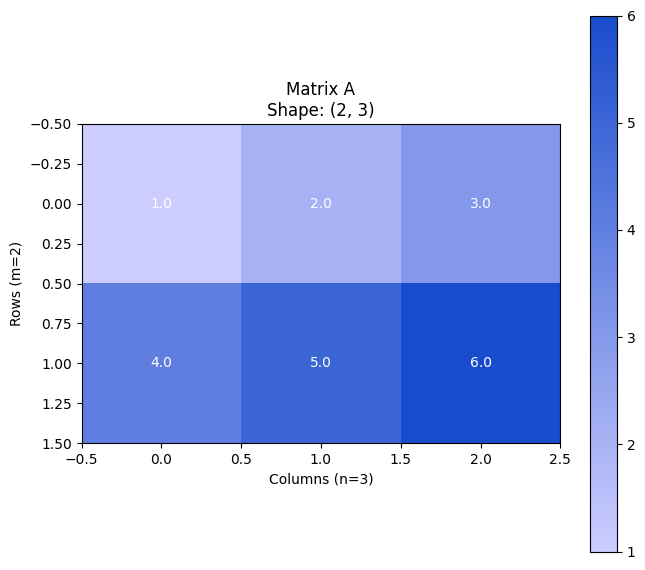

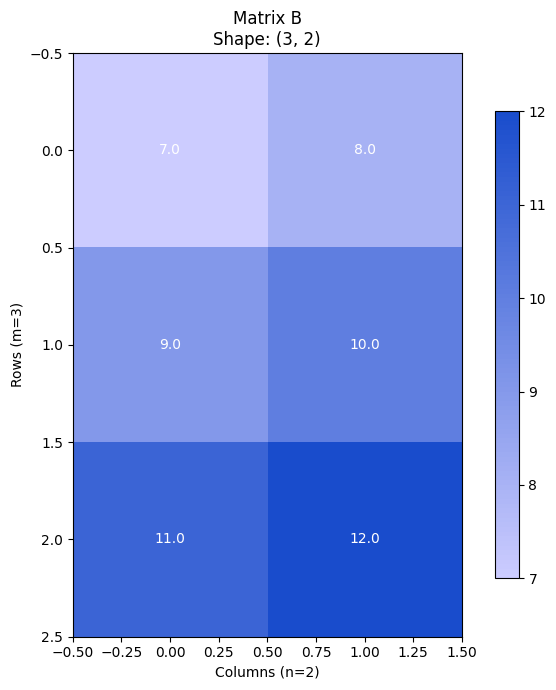

/tmp/ipykernel_47933/3531021035.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


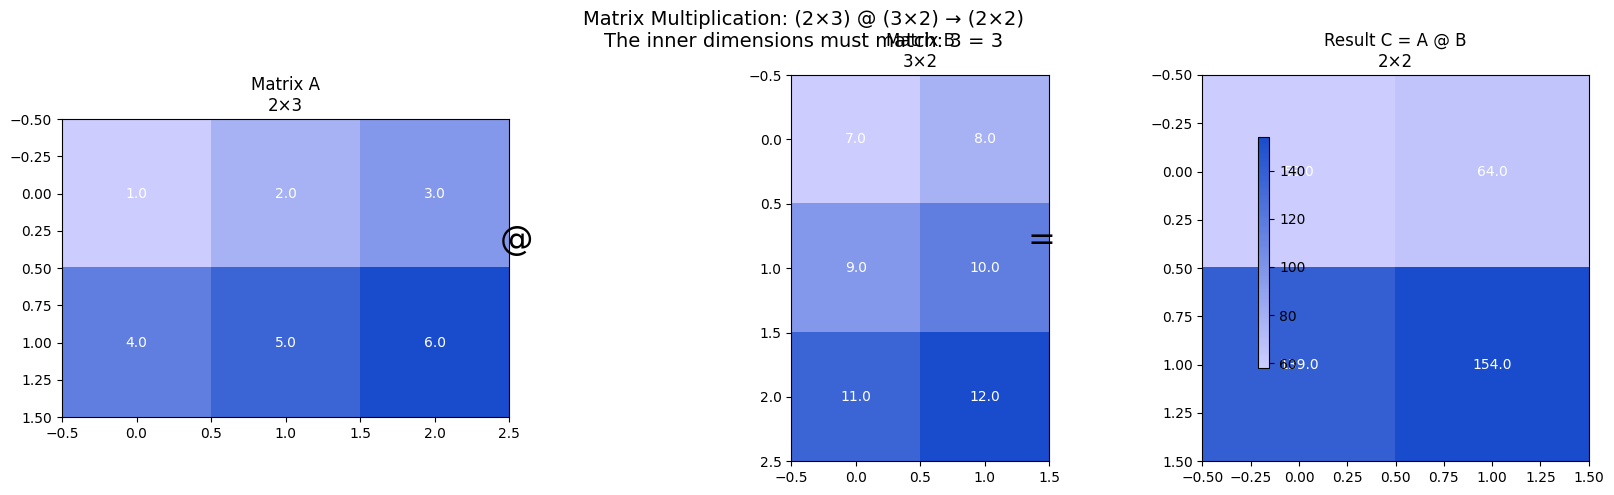


2. Understanding Matrix Multiplication as Dot Products


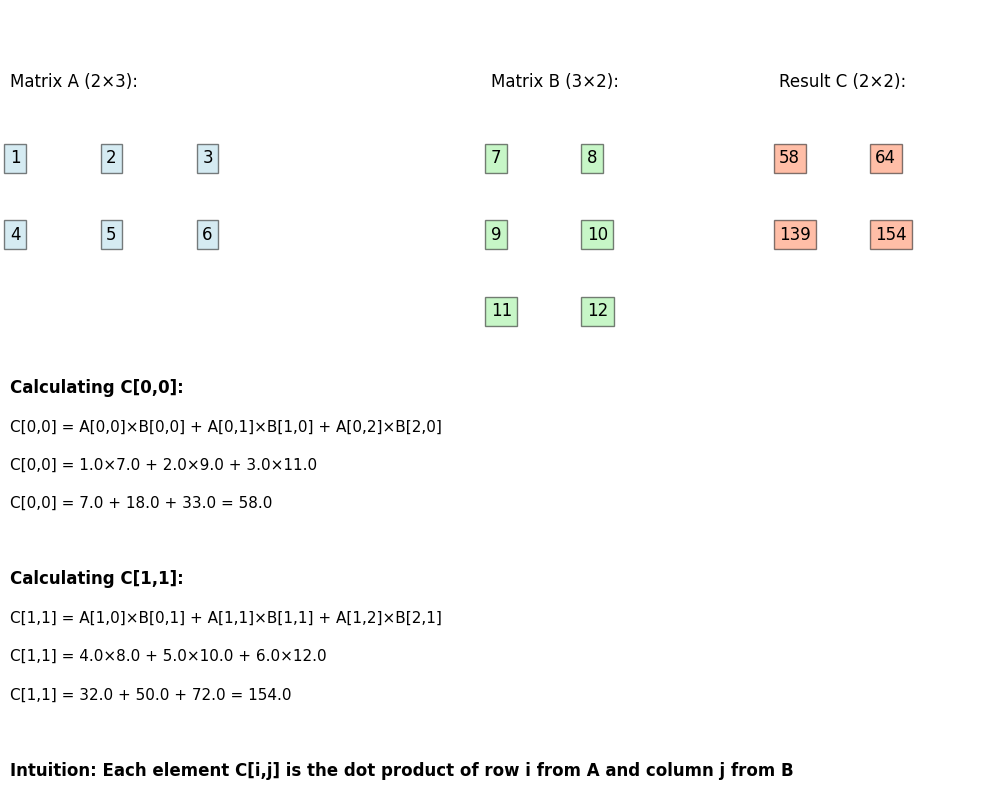


3. Matrix Dimension Rules
Matrix Multiplication Dimension Rules

For multiplication A @ B to be valid:
- A must be of shape (m × n)
- B must be of shape (n × p)
- The inner dimensions (n) must match
- The result C will be of shape (m × p)

Examples of compatible dimensions:
- (2 × 3) @ (3 × 4) → (2 × 4)
- (5 × 2) @ (2 × 3) → (5 × 3)
- (1 × 4) @ (4 × 10) → (1 × 10)
- (10 × 7) @ (7 × 1) → (10 × 1)

Examples of incompatible dimensions:
- (2 × 3) @ (4 × 5) → Error! Inner dimensions don't match: 3 ≠ 4
- (5 × 2) @ (3 × 4) → Error! Inner dimensions don't match: 2 ≠ 3

Demonstrating a compatible example:
A shape: torch.Size([2, 3])
B shape: torch.Size([3, 4])
C = A @ B shape: torch.Size([2, 4])

Demonstrating an incompatible example:
A shape: torch.Size([2, 3])
D shape: torch.Size([4, 5])
Error: mat1 and mat2 shapes cannot be multiplied (2x3 and 4x5)

4. Random Matrices Example


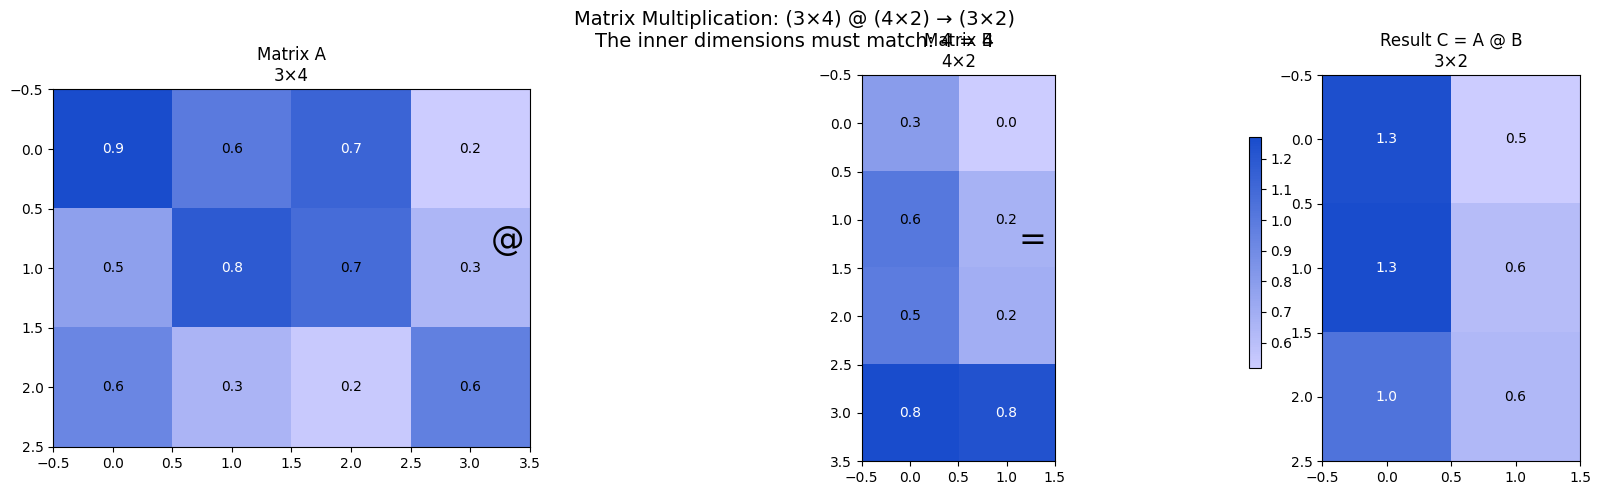


5. Special Case: Matrix-Vector Multiplication


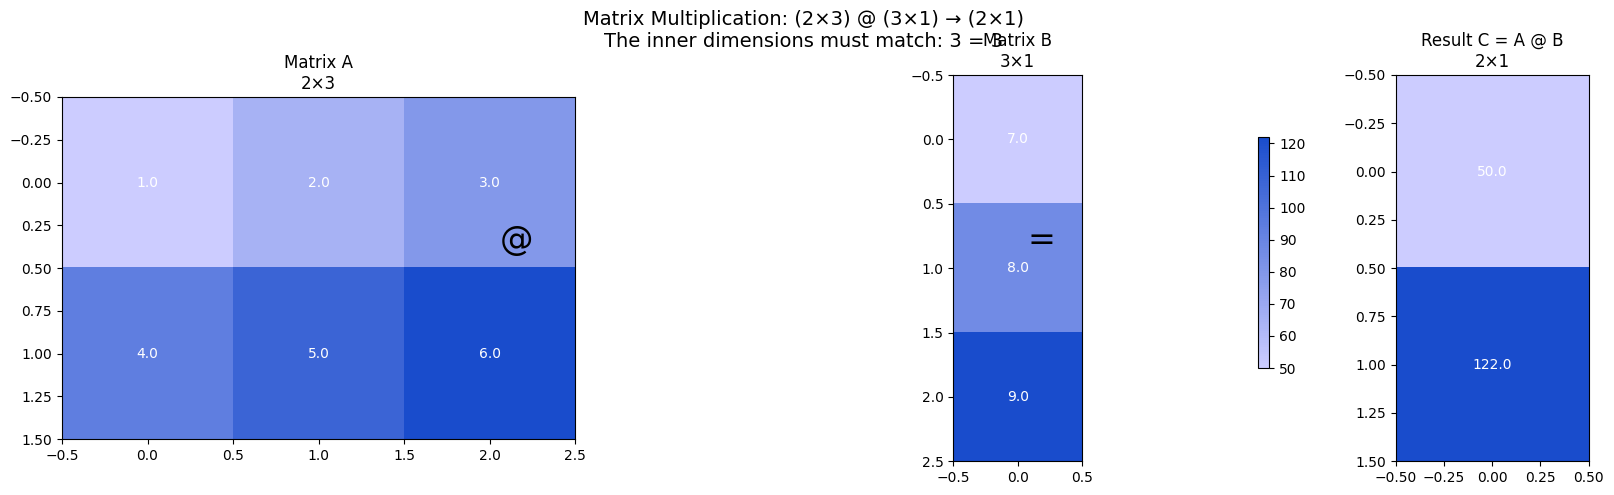


Matrix multiplication is one of the most fundamental operations in linear algebra.
It forms the basis for many algorithms in machine learning, computer graphics,
and numerical computing.


In [7]:
if __name__ == "__main__":
    main()